In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from json import loads
import os
import glob
import datetime
import re

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-24_WaterElf-10878526.txt
Unable to produce graph!
old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-25_WaterElf-10878526.txt


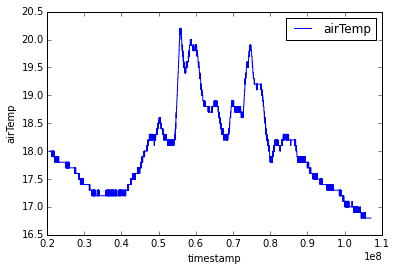

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-26_WaterElf-10878526.txt


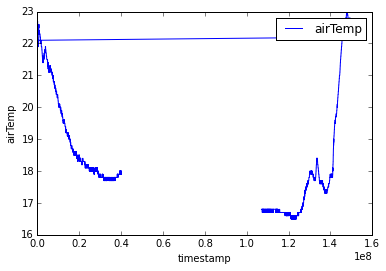

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-27_WaterElf-10878526.txt


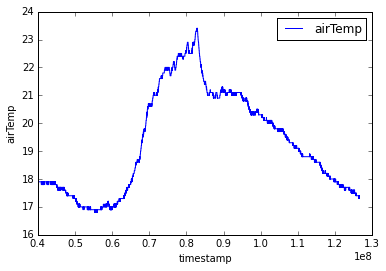

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-28_WaterElf-10878526.txt


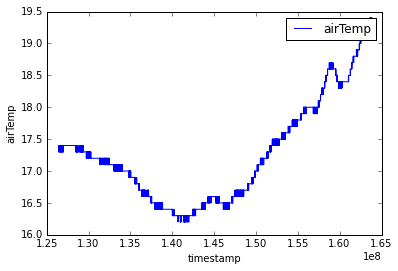

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-24_WaterElf-10878526.txt
Unable to produce graph!
old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-25_WaterElf-10878526.txt


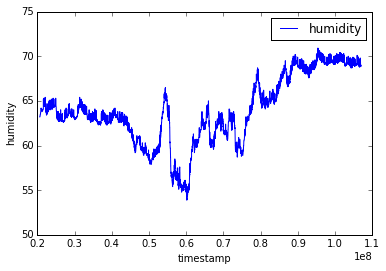

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-26_WaterElf-10878526.txt


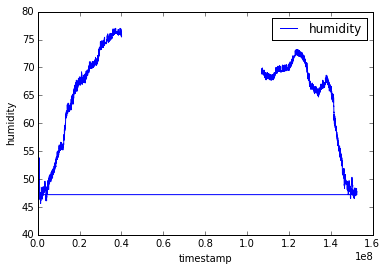

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-27_WaterElf-10878526.txt


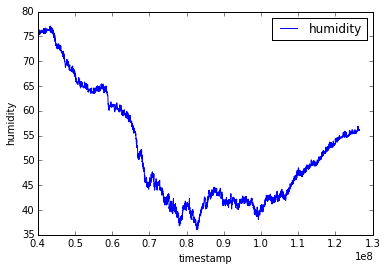

old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526\2016-06-28_WaterElf-10878526.txt


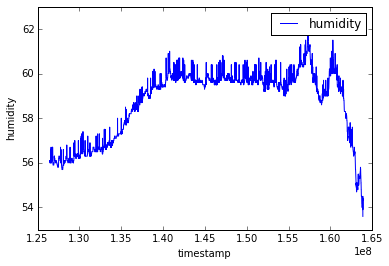

In [2]:
#THIS VERSION WILL CREATE GRAPHS OF ASSIGNED COMBINATIONS FOR EACH OF THE DATA IN THE PATH
def get_points(x, y):
    path = 'old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526'
    
    for filename in glob.glob(os.path.join(path, '*.txt')):
        print(filename)
        data={}
        with open(filename,'r') as f:
            
            for line in f:
                new_dict = loads(line.strip())
                for k in new_dict:
                    if k in data:
                        data[k].append(float(new_dict[k]))
                    else:
                        data[k] = [float(new_dict[k])]

        array = np.array([data[x], data[y]])
        if len(data[x]) != len(data[y]):
            print ('Unable to produce graph!')
            continue
        #for x,y in array:
        plt.plot(array[0], array[1],label=y)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        plt.show()
    
get_points('timestamp', 'airTemp')
get_points('timestamp', 'humidity')                  

2016-06-26_WaterElf-10878526.txt


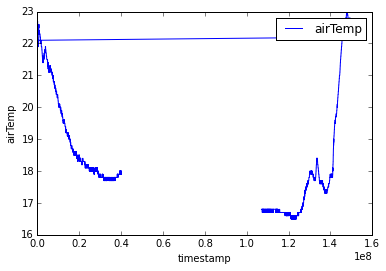

In [3]:
# THIS VERSION WILL ONLY PRODUCE DATA OF ASSIGNED DATE
def get_points(x, y ,z):
    path = 'old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526'
    chosen_file = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and z in i]
    for filename in chosen_file:
        print(filename)
        data={}
        with open(os.path.join(path, filename),'r') as f:
            
            for line in f:
                new_dict = loads(line.strip())
                for k in new_dict:
                    if k in data:
                        data[k].append(float(new_dict[k]))
                    else:
                        data[k] = [float(new_dict[k])]

        array = np.array([data[x], data[y]])
        if len(data[x]) != len(data[y]):
            print ('Unable to produce graph!')
            continue
        #for x,y in array:
        plt.plot(array[0], array[1],label=y)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        plt.show()
    
get_points('timestamp', 'airTemp','06-26')                 

In [ ]:
#STILL IN PROGRESS,TRYING TO CONVERT TIMESTAMP TO ACTUAL TIME. 

def get_points(x, y ,d):
    path = 'old-stuff/fishy-wifi-master/wegrow-web/wegrow-data1/wegrow-data/WaterElf-10878526'
    chosen_file = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and d in i]
    for filename in chosen_file:
        print(filename)
        data={}
        with open(os.path.join(path, filename),'r') as f:
            
            for line in f:
                new_dict = loads(line.strip())
                for k in new_dict:
                    if k in data:
                        data[k].append(float(new_dict[k]))
                    else:
                        data[k] = [float(new_dict[k])]

        array = np.array([data[x], data[y]])
        if x == 'timestamp':
            #convert data[x] from timestamp into time
            timestamp = data[x]
            date = re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", filename)
            x = date.group(0)
            year = x[0:4]
            month = x[5:7]
            day = x[8:10]
            fileStartDate = datetime.datetime(int(year),int(month),int(day),0,0)
            print("file starts at: " + str(fileStartDate))
            startTimeStamp = timestamp[0]
            print (startTimeStamp)
            #startTime = convert startTimeStamp into time
 
#THIS VERSION(OF TIME CONVERSION) MAKES MORES SENSE,ALTHOUGH I DOUBT WHETHER IT IS THE RIGHT WAY
            increment = 0
            previous = 0
            l = len(timestamp)
            for index,times in enumerate(timestamp):
                while previous > times:  # device restart, for example
                    increment = timestamp[index - 1] - times
                    times += increment
                    
                delta = datetime.timedelta(0, (times - startTimeStamp) / 1000);
                timeAtT = fileStartDate + delta;
                print("time at t=" + str(times) + " is: " + str(timeAtT));
                previous = times
                                                    
        if len(timestamp) != len(data[y]):
            print ('Unable to produce graph!')
            continue
        #for x,y in array:
        plt.plot(array[0], array[1],label=y)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        plt.show()
    
get_points('timestamp', 'airTemp','06-26')   

2016-06-26_WaterElf-10878526.txt
file starts at: 2016-06-26 00:00:00
107048571.0
time at t=107048571.0 is: 2016-06-26 00:00:00
time at t=107050090.0 is: 2016-06-26 00:00:01.519000
time at t=107051858.0 is: 2016-06-26 00:00:03.287000
time at t=107053334.0 is: 2016-06-26 00:00:04.763000
time at t=107055117.0 is: 2016-06-26 00:00:06.546000
time at t=107056630.0 is: 2016-06-26 00:00:08.059000
time at t=107058402.0 is: 2016-06-26 00:00:09.831000
time at t=107059867.0 is: 2016-06-26 00:00:11.296000
time at t=107061635.0 is: 2016-06-26 00:00:13.064000
time at t=107063125.0 is: 2016-06-26 00:00:14.554000
time at t=107065713.0 is: 2016-06-26 00:00:17.142000
time at t=107067621.0 is: 2016-06-26 00:00:19.050000
time at t=107069141.0 is: 2016-06-26 00:00:20.570000
time at t=107070942.0 is: 2016-06-26 00:00:22.371000
time at t=107072470.0 is: 2016-06-26 00:00:23.899000
time at t=107074293.0 is: 2016-06-26 00:00:25.722000
time at t=107075862.0 is: 2016-06-26 00:00:27.291000
time at t=107077655.0 is: